# 시각화

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline 

# 한글 문제 해결
# matplotlib의 기본폰트에서 한글이 지원되지 않음
# 시스템별로 한글 지원하는 폰트로 변경해야 함
import platform
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [3]:
data = pd.read_csv("data/final_data.csv")

In [4]:
data = data.iloc[:, 1:]

In [5]:
data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,05-16,14,일
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,05-16,15,일
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0.0,0.0,1.0,1.0,NaN,NaN,NaN,05-16,15,일
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,05-16,15,일
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,1.0,0.0,0.0,1.0,NaN,NaN,NaN,05-16,16,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021-05-19 17:00:00,여자,청년,서울,중립,분식,한식,중식,25.9,0.0,...,NaN,NaN,NaN,NaN,0.0,1.0,0.0,05-19,17,수
381,2021-05-19 19:00:00,여자,청년,서울,행복,양식,일식,한식,24.1,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,05-19,19,수
382,2021-05-19 20:00:00,여자,청년,서울,행복,일식,분식,한식,22.1,0.0,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,05-19,20,수
383,2021-05-19 20:00:00,여자,청년,서울,행복,양식,중식,분식,22.1,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,05-19,20,수


### (1) 성별, 연령대에 따른 1순위 음식 분류

In [6]:
a1 = data.pivot_table("기온",
                      columns=["성별","연령대"],
                      index="1순위",
                      aggfunc="count")
a1

성별    남자                     여자                  
연령대   노년   중장년    청년   청소년   노년   중장년    청년   청소년
1순위                                              
분식   NaN   1.0   4.0   7.0  NaN   6.0   8.0   8.0
양식   NaN   6.0  20.0  26.0  NaN   5.0  13.0   6.0
일식   NaN   1.0  24.0  22.0  1.0   3.0  15.0  11.0
중식   NaN   6.0   4.0   8.0  NaN   3.0   4.0   NaN
한식   3.0  33.0  46.0  18.0  1.0  30.0  29.0  13.0

In [7]:
def ascend_sum(df):
    df['합계'] = df.sum(axis=1)
    df = df.sort_values('합계', ascending=True) # 합계를 기준으로 정렬
    df = df.iloc[:, :-1] # 합계 열 제외
    return df

In [8]:
a1 = ascend_sum(a1)

In [9]:
a1

성별    남자                     여자                  
연령대   노년   중장년    청년   청소년   노년   중장년    청년   청소년
1순위                                              
중식   NaN   6.0   4.0   8.0  NaN   3.0   4.0   NaN
분식   NaN   1.0   4.0   7.0  NaN   6.0   8.0   8.0
양식   NaN   6.0  20.0  26.0  NaN   5.0  13.0   6.0
일식   NaN   1.0  24.0  22.0  1.0   3.0  15.0  11.0
한식   3.0  33.0  46.0  18.0  1.0  30.0  29.0  13.0

In [10]:
# a1['합계'] = a1.sum(axis=1)
# a1 = a1.sort_values('합계', ascending=True)
# a1 = a1.iloc[:, :-1]

In [11]:
def stack_bar(df, kind='bar', stack=False):
    df.plot(kind=kind, figsize=(10,10), fontsize=15, stacked=stack),
    plt.ylabel(''),
    plt.show()

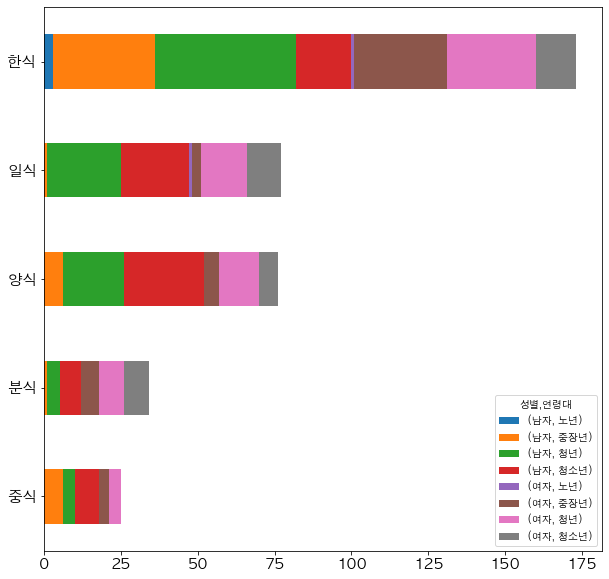

In [12]:
stack_bar(a1, kind='barh', stack=True)

### (2) 성별에 따른 메뉴 분포

In [13]:
data.columns

Index(['시간대', '성별', '연령대', '지역', '기분', '1순위', '2순위', '3순위', '기온', '강수량', '습도',
       '기압', '전운량', '불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥',
       '파스타', '스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕',
       '날짜', '시간', '요일'],
      dtype='object')

In [14]:
menu_list = ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥',
             '파스타', '스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕']

In [15]:
menu_list

['불고기',
 '냉면',
 '칼국수',
 '된장찌개',
 '비빔밥',
 '김치찌개',
 '떡볶이',
 '김밥',
 '파스타',
 '스테이크',
 '햄버거',
 '초밥',
 '우동',
 '메밀소바',
 '돈가스',
 '볶음밥',
 '짜장면',
 '짬뽕']

In [16]:
a2 = data.groupby('성별')[menu_list].sum().T
a2

성별,남자,여자
불고기,92.0,44.0
냉면,52.0,38.0
칼국수,37.0,33.0
된장찌개,61.0,37.0
비빔밥,69.0,47.0
김치찌개,71.0,30.0
떡볶이,45.0,70.0
김밥,27.0,35.0
파스타,60.0,62.0
스테이크,75.0,40.0


In [17]:
a2 = ascend_sum(a2)

In [18]:
# a2['합계'] = a2.sum(axis=1)
# a2 = a2.sort_values('합계', ascending=True)
# a2 = a2.iloc[:, :-1]

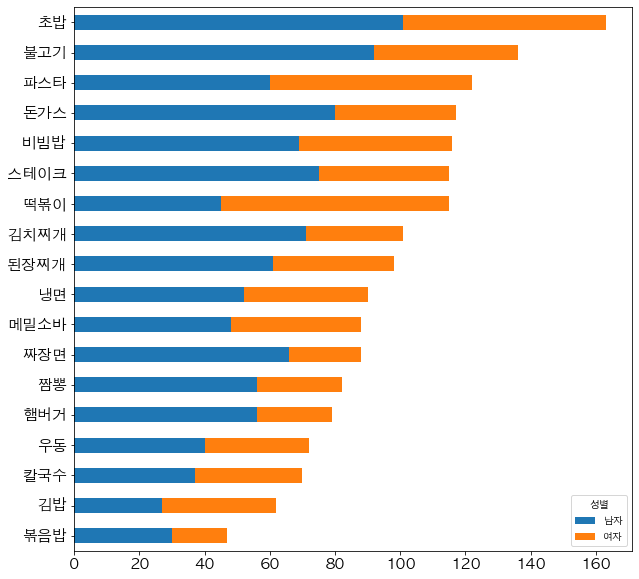

In [19]:
stack_bar(a2, kind='barh', stack=True)

### (3) 기분에 따른 메뉴 분포

In [20]:
a3 = data.groupby('기분')[menu_list].sum().T
a3

기분,분노,우울,중립,행복
불고기,6.0,24.0,42.0,64.0
냉면,5.0,17.0,25.0,43.0
칼국수,2.0,14.0,25.0,29.0
된장찌개,1.0,21.0,31.0,45.0
비빔밥,5.0,14.0,37.0,60.0
김치찌개,3.0,22.0,31.0,45.0
떡볶이,6.0,22.0,42.0,45.0
김밥,1.0,13.0,23.0,25.0
파스타,5.0,28.0,29.0,60.0
스테이크,5.0,23.0,34.0,53.0


In [21]:
a3 = ascend_sum(a3)

In [22]:
# a3['합계'] = a3.sum(axis=1)
# a3 = a3.sort_values('합계', ascending=True)
# a3 = a3.iloc[:, :-1]

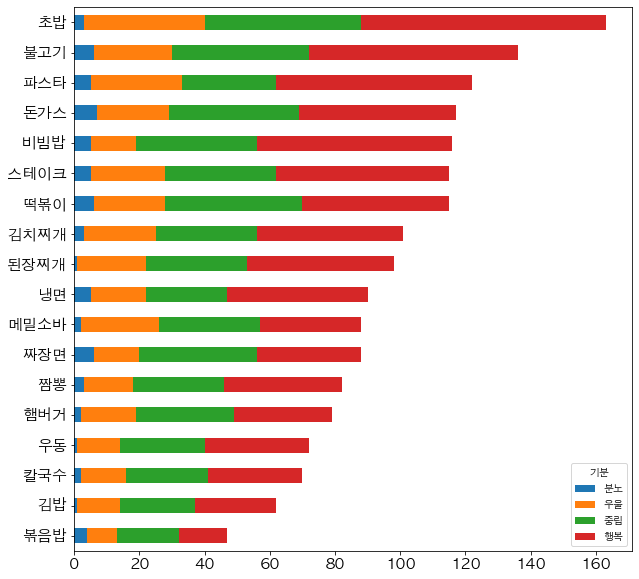

In [23]:
stack_bar(a3, kind='barh', stack=True)

### (4) 요일에 따른 메뉴

In [24]:
data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,05-16,14,일
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,05-16,15,일
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0.0,0.0,1.0,1.0,NaN,NaN,NaN,05-16,15,일
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,05-16,15,일
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,1.0,0.0,0.0,1.0,NaN,NaN,NaN,05-16,16,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021-05-19 17:00:00,여자,청년,서울,중립,분식,한식,중식,25.9,0.0,...,NaN,NaN,NaN,NaN,0.0,1.0,0.0,05-19,17,수
381,2021-05-19 19:00:00,여자,청년,서울,행복,양식,일식,한식,24.1,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,05-19,19,수
382,2021-05-19 20:00:00,여자,청년,서울,행복,일식,분식,한식,22.1,0.0,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,05-19,20,수
383,2021-05-19 20:00:00,여자,청년,서울,행복,양식,중식,분식,22.1,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,05-19,20,수


In [25]:
a4 = data.groupby(['요일']).sum()[menu_list]
a4

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
요일,,,,,,,,,,,,,,,,,,
수,13.0,14.0,6.0,8.0,10.0,5.0,13.0,6.0,16.0,13.0,9.0,17.0,6.0,8.0,13.0,4.0,8.0,9.0
월,15.0,7.0,6.0,16.0,14.0,12.0,15.0,11.0,13.0,7.0,10.0,21.0,11.0,13.0,18.0,7.0,15.0,3.0
일,54.0,36.0,34.0,43.0,46.0,47.0,48.0,19.0,45.0,55.0,36.0,61.0,32.0,32.0,47.0,21.0,43.0,44.0
화,54.0,33.0,24.0,31.0,46.0,37.0,39.0,26.0,48.0,40.0,24.0,64.0,23.0,35.0,39.0,15.0,22.0,26.0


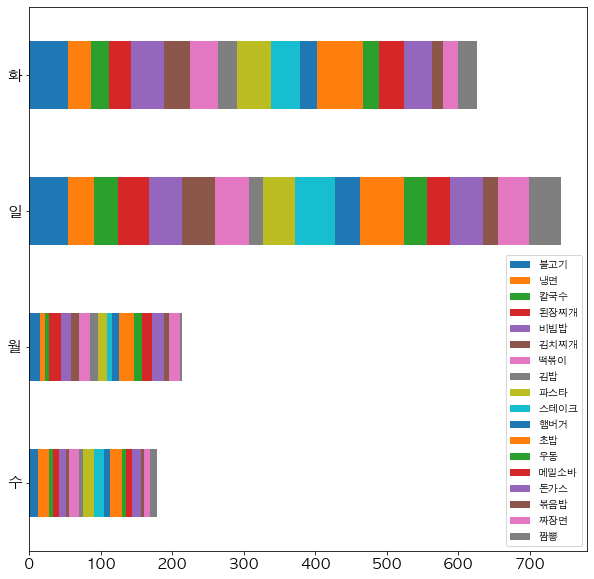

In [26]:
stack_bar(a4, kind='barh', stack=True)

### (5) 연령에 따른 전체메뉴

In [27]:
menu_list

['불고기',
 '냉면',
 '칼국수',
 '된장찌개',
 '비빔밥',
 '김치찌개',
 '떡볶이',
 '김밥',
 '파스타',
 '스테이크',
 '햄버거',
 '초밥',
 '우동',
 '메밀소바',
 '돈가스',
 '볶음밥',
 '짜장면',
 '짬뽕']

In [28]:
a5 = data.groupby(['연령대']).sum()[menu_list]
a5

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
연령대,,,,,,,,,,,,,,,,,,
노년,2.0,0.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,3.0,2.0,0.0,1.0,0.0,1.0,1.0
중장년,35.0,13.0,9.0,18.0,37.0,17.0,15.0,14.0,22.0,30.0,7.0,34.0,6.0,20.0,7.0,9.0,15.0,21.0
청년,56.0,33.0,26.0,45.0,46.0,49.0,56.0,31.0,60.0,40.0,39.0,72.0,28.0,39.0,69.0,24.0,39.0,29.0
청소년,43.0,44.0,33.0,33.0,31.0,35.0,43.0,16.0,40.0,44.0,32.0,54.0,36.0,29.0,40.0,14.0,33.0,31.0


In [29]:
a5 = ascend_sum(a5)

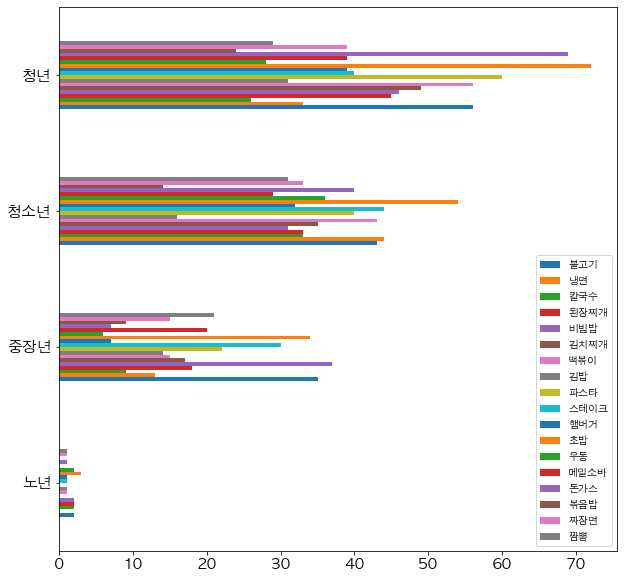

In [30]:
stack_bar(a5, kind='barh', stack=False)

### (7) 기온에 따른 메뉴

In [31]:
a7 = data.groupby(['기온']).sum()[menu_list]
a7

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
기온,,,,,,,,,,,,,,,,,,
10.7,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
13.3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
14.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0
14.3,2.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25.7,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25.9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26.2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
a7.index

Float64Index([10.7, 13.3, 13.8, 14.0, 14.3, 14.6, 14.9, 15.0, 15.1, 15.2, 15.4,
              15.5, 15.6, 15.8, 15.9, 16.0, 16.1, 16.2, 16.5, 16.6, 16.7, 16.8,
              17.0, 17.1, 17.3, 17.4, 17.5, 17.7, 17.9, 18.0, 18.1, 18.5, 18.8,
              19.0, 19.1, 19.2, 19.4, 19.7, 20.1, 20.2, 20.3, 20.5, 20.6, 20.8,
              21.0, 21.6, 21.9, 22.0, 22.1, 22.2, 22.6, 23.0, 23.1, 23.7, 24.0,
              24.1, 24.2, 25.5, 25.7, 25.9, 26.2, 26.3, 26.5],
             dtype='float64', name='기온')

In [ ]:
10 15 20 25 30